In [1]:
import numpy as np # Library python yang umum digunakan untuk operasi numerik, terutama operasi array numerik multidimensi
import pandas as pd # Library python yang digunakan untuk manipulasi dan analisis data, terutama dengan struktur data seperti DataFrames.

from matplotlib import pyplot as plt # Library python untuk membuat visualisasi grafis. Modul 'pyplot' -> antarmuka membuat grafik dan plot
import seaborn as sns # Librayr python untuk membuat plot statistik yang indah dan informatif

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_product_info = pd.read_csv("/Assets/product_info.csv")
df_reviews_1 = pd.read_csv("/Assets/reviews_0_250.csv",index_col = 0, dtype={'author_id':'str'})
df_reviews_2 = pd.read_csv("/Assets/reviews_250_500.csv",index_col = 0, dtype={'author_id':'str'})
df_reviews_3 = pd.read_csv("/Assets/reviews_500_750.csv",index_col = 0, dtype={'author_id':'str'})
df_reviews_4 = pd.read_csv("/Assets/reviews_750_1000.csv",index_col = 0, dtype={'author_id':'str'})
df_reviews_5 = pd.read_csv("/Assets/reviews_1000_1500.csv",index_col = 0, dtype={'author_id':'str'})
df_reviews_6 = pd.read_csv("/Assets/reviews_1500_end.csv",index_col = 0, dtype={'author_id':'str'})

In [3]:
# Merge df_reviews_1 till df_reviews_6
df_reviews = pd.concat([df_reviews_1,df_reviews_2,df_reviews_3,df_reviews_4,df_reviews_5,df_reviews_6],axis=0)
print("df_reviews shape: ",df_reviews.shape) # Mendapatkan total data baris dan column pada df_reviews
print("df_product_info shape: ",df_product_info.shape) # Mendapatkan total data baris dan column pada df_product_info

df_reviews shape:  (1301136, 18)
df_product_info shape:  (8494, 27)


In [4]:
# Lets check df_product_info which columns that similar with df_reviews
cols_to_use = df_product_info.columns.difference(df_reviews.columns) # Identifikasi column-column yang terdapat di df_product_info tetapi tidak ada di df_reviews
cols_to_use = list(cols_to_use) # Mengubah objek index ke dalam bentuk list
cols_to_use.append('product_id') # Menambahkan column product_id pada cols_to_use
print(cols_to_use)

['brand_id', 'child_count', 'child_max_price', 'child_min_price', 'highlights', 'ingredients', 'limited_edition', 'loves_count', 'new', 'online_only', 'out_of_stock', 'primary_category', 'reviews', 'sale_price_usd', 'secondary_category', 'sephora_exclusive', 'size', 'tertiary_category', 'value_price_usd', 'variation_desc', 'variation_type', 'variation_value', 'product_id']


In [5]:
# Menggabungkan df_reviews dan df_product_info[cols_to_use] berdasarkan kolom 'product_id'
df = pd.merge(df_reviews, df_product_info[cols_to_use], how='outer', on=['product_id', 'product_id'])
df.shape  

(1307279, 40)

In [6]:
# Menampilkan data teratas
df.head(5)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,...,reviews,sale_price_usd,secondary_category,sephora_exclusive,size,tertiary_category,value_price_usd,variation_desc,variation_type,variation_value
0,1741593524,5.0,1.0,1.0,2.0,0.0,2.0,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,...,1.0,NaN,Cleansers,0,2.4 oz / 70 ml,NaN,NaN,NaN,Size,2.4 oz / 70 ml
1,31423088263,1.0,0.0,NaN,0.0,0.0,0.0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,...,16118.0,NaN,Lip Balms & Treatments,1,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original
2,5061282401,5.0,1.0,NaN,0.0,0.0,0.0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,...,16118.0,NaN,Lip Balms & Treatments,1,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original
3,6083038851,5.0,1.0,NaN,0.0,0.0,0.0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,...,16118.0,NaN,Lip Balms & Treatments,1,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original
4,47056667835,5.0,1.0,NaN,0.0,0.0,0.0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,...,16118.0,NaN,Lip Balms & Treatments,1,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original


In [7]:
missing = []
unique = []
types = []
variables = []
count = []

for item in df.columns:
    variables.append(item)
    missing.append(df[item].isnull().sum())
    unique.append(df[item].nunique())
    types.append(df[item].dtypes)
    count.append(len(df[item]))

output = pd.DataFrame({
    'variable': variables,
    'dtype': types,
    'count': count,
    'unique': unique,
    'missing': missing,

})
print("Df info : ")
output.sort_values("missing",ascending=False).reset_index(drop=True)

Df info : 


,variable,dtype,count,unique,missing
0,variation_desc,object,1307279,935,1297124
1,sale_price_usd,float64,1307279,88,1294858
2,value_price_usd,float64,1307279,174,1273535
3,child_max_price,float64,1307279,222,790996
4,child_min_price,float64,1307279,208,790996
5,helpfulness,float64,1307279,3767,675609
6,review_title,object,1307279,364105,376525
7,hair_color,object,1307279,7,269455
8,eye_color,object,1307279,6,249545
9,skin_tone,object,1307279,14,203481


In [8]:
cols = """variation_desc
sale_price_usd
value_price_usd
child_max_price
child_min_price
review_title"""
cols_list = cols.split("\n")
# Drop the columns
df.drop(columns=cols_list,axis=1,inplace=True)

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.describe()

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd,brand_id,child_count,limited_edition,loves_count,new,online_only,out_of_stock,reviews,sephora_exclusive
count,366388.000000,366388.000000,366388.000000,366388.000000,366388.000000,366388.000000,366388.000000,366388.000000,366388.000000,366388.000000,366388.000000,366388.000000,366388.000000,366388.000000,366388.000000,366388.000000
mean,4.058645,0.767247,0.767208,8.773863,1.885411,6.888452,48.883916,5940.306934,0.772050,0.017307,112194.762918,0.010936,0.061500,0.016799,1588.734282,0.429861
std,1.350033,0.422587,0.316270,30.592218,7.311350,26.624991,39.251359,1138.083685,1.218538,0.130412,139879.179015,0.104004,0.240246,0.128518,1603.237767,0.495057
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,1063.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,1.000000,0.640000,2.000000,0.000000,1.000000,28.000000,5987.000000,0.000000,0.000000,25847.000000,0.000000,0.000000,0.000000,562.000000,0.000000
50%,5.000000,1.000000,0.923077,4.000000,1.000000,3.000000,42.000000,6195.000000,0.000000,0.000000,61536.000000,0.000000,0.000000,0.000000,989.000000,0.000000
75%,5.000000,1.000000,1.000000,8.000000,2.000000,7.000000,63.000000,6285.000000,1.000000,0.000000,139007.000000,0.000000,0.000000,0.000000,2049.000000,1.000000
max,5.000000,1.000000,1.000000,3851.000000,1094.000000,3481.000000,425.000000,8017.000000,13.000000,1.000000,763168.000000,1.000000,1.000000,1.000000,8733.000000,1.000000


In [11]:
df.shape

(366388, 34)

In [12]:
df['submission_time'] = pd.to_datetime(df['submission_time'])

df['year']= df['submission_time'].dt.year

df['month']= df['submission_time'].dt.month

df['day']= df['submission_time'].dt.day

df['weekday']= df['submission_time'].dt.weekday

dw_mapping={
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

df['dayofweek']= df['submission_time'].dt.weekday.map(dw_mapping)

In [13]:
from matplotlib.ticker import NullFormatter
import matplotlib as mpl
mpl.style.use(['ggplot'])
def hundformatter(x, pos):
    return str(round(x / 1e4, 1))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

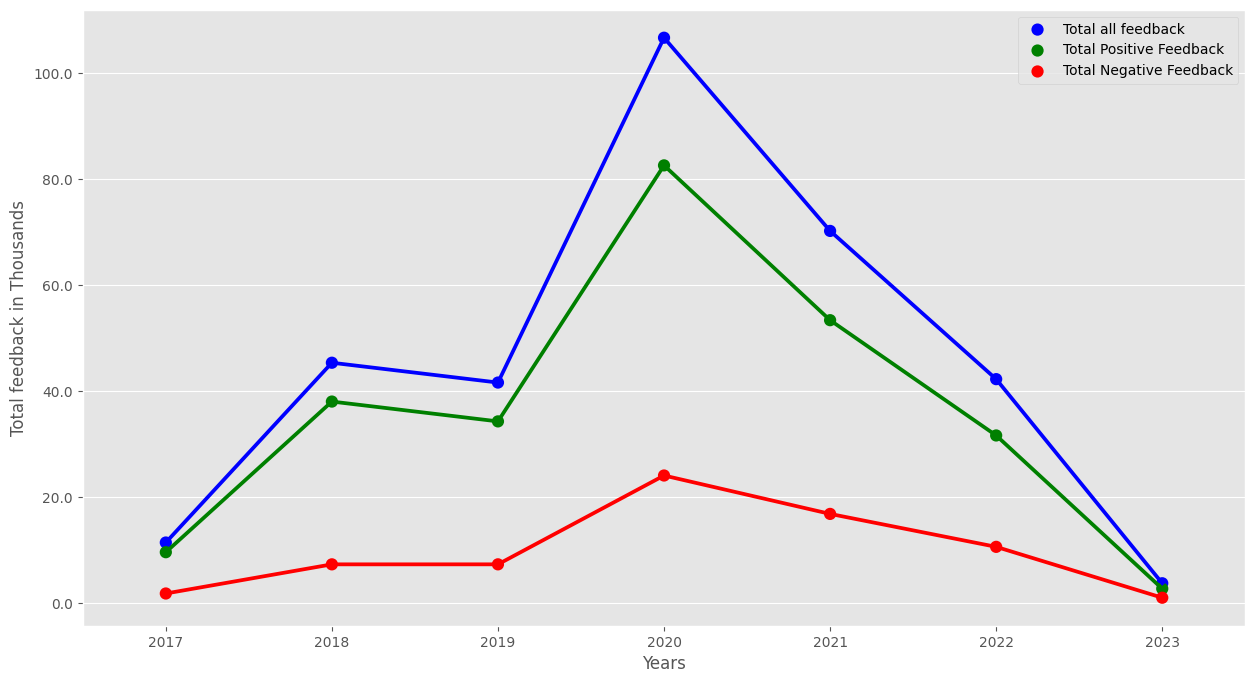

In [14]:
fig, (ax1) = plt.subplots(nrows=1,ncols=1,figsize= (15,8))
total_feedback = df.groupby('year').sum(numeric_only=True)['total_feedback_count'].reset_index()

sns.pointplot(data=total_feedback,x='year',y='total_feedback_count', color="blue", label="Total all feedback",ax=ax1)

total_pos_feedback = df.groupby('year').sum(numeric_only=True)['total_pos_feedback_count'].reset_index()
sns.pointplot(data=total_pos_feedback,x='year',y='total_pos_feedback_count', color="green", label="Total Positive Feedback",ax=ax1)

total_neg_feedback = df.groupby('year').sum(numeric_only=True)['total_neg_feedback_count'].reset_index()
sns.pointplot(data=total_neg_feedback,x='year',y='total_neg_feedback_count', color="red", label="Total Negative Feedback",ax=ax1)

ax1.yaxis.set_major_formatter(hundformatter)
ax1.set_ylabel("Total feedback in Thousands")
ax1.set_xlabel("Years")
ax1.legend()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

Text(0.5, 0.98, 'Top 10 Product')

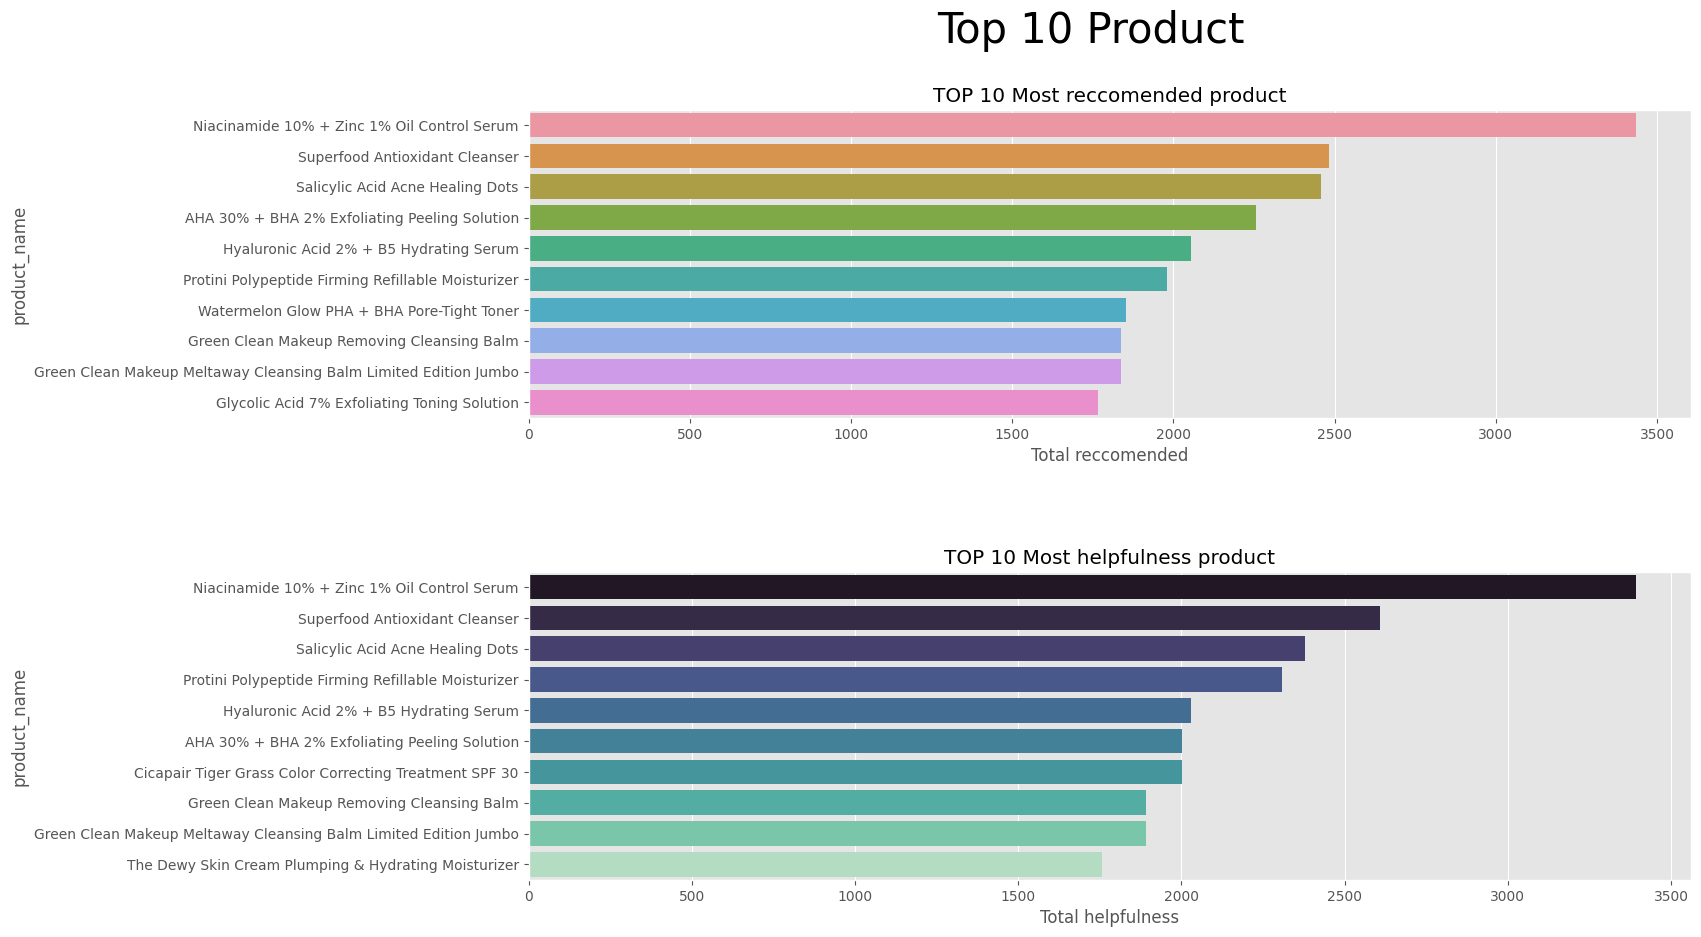

In [15]:
#Top 10  product
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize= (15,10))
fig.subplots_adjust(hspace=0.5)

most_reccomended = df.groupby(['product_id','product_name','brand_name']).sum(numeric_only=True)['is_recommended'].reset_index()\
.sort_values('is_recommended',ascending=False).head(10)
sns.barplot(data=most_reccomended,x='is_recommended',y='product_name',ax=ax1)
ax1.set_title("TOP 10 Most reccomended product")
ax1.set_xlabel("Total reccomended")

most_helpfulness = df.groupby(['product_id','product_name','brand_name']).sum(numeric_only=True)['helpfulness'].reset_index()\
.sort_values('helpfulness',ascending=False).head(10)
sns.barplot(data=most_helpfulness,x='helpfulness',y='product_name',ax=ax2,palette='mako')
ax2.set_title("TOP 10 Most helpfulness product")
ax2.set_xlabel("Total helpfulness")

plt.suptitle("Top 10 Product",fontsize=30)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

Text(0.5, 0.98, 'Top 10 Product based on price')

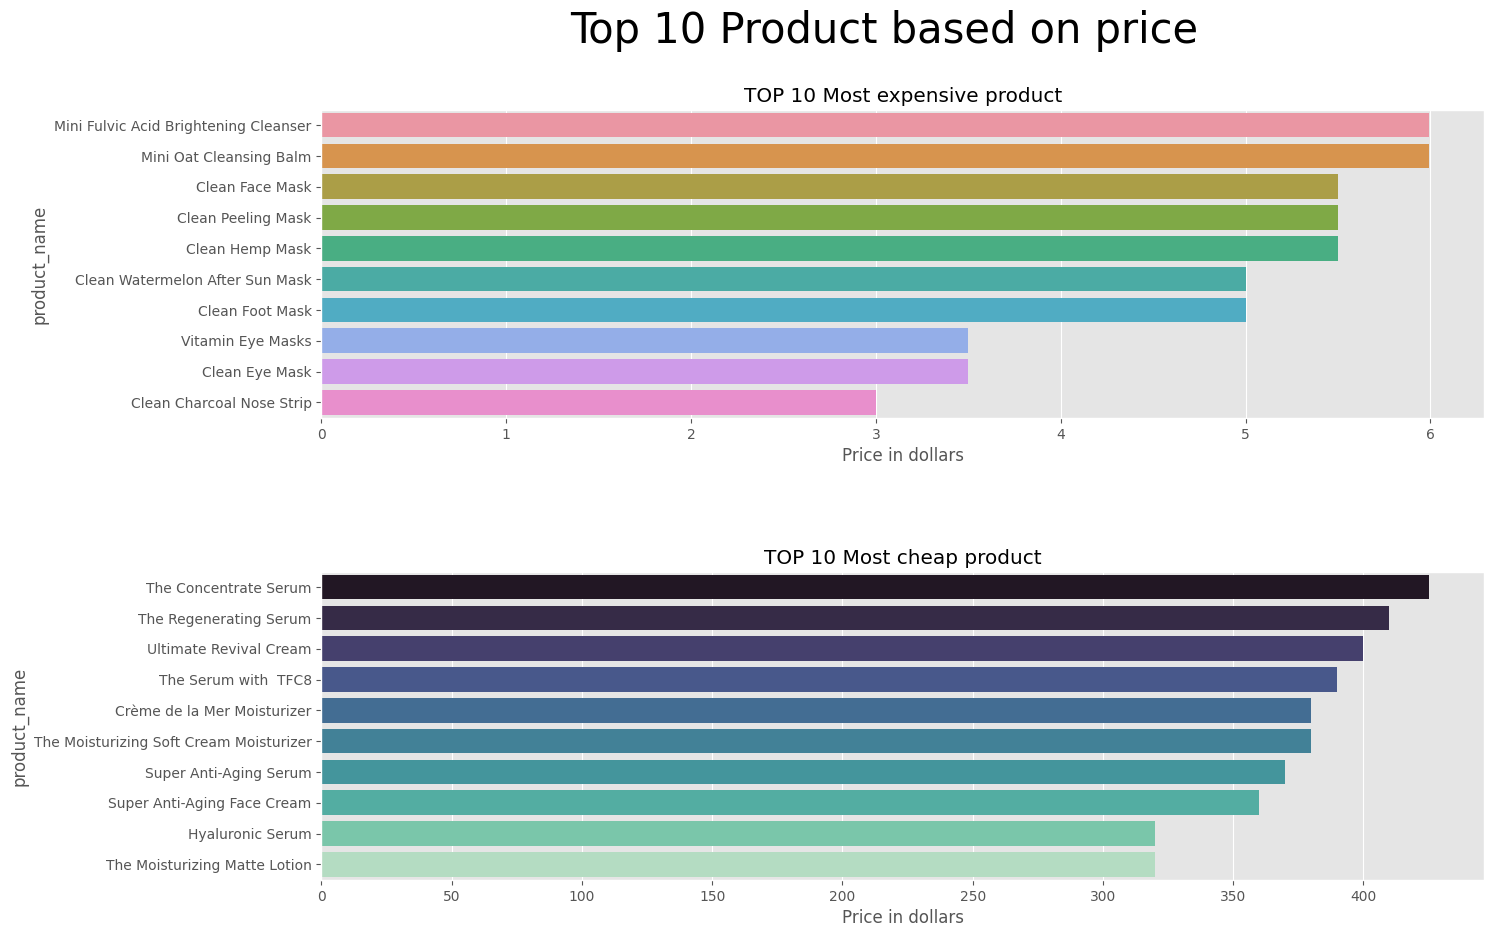

In [16]:
# Top 10 most expensive and cheap product

#Top 10  product
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize= (15,10))
fig.subplots_adjust(hspace=0.5)

most_expensive = df.groupby(['product_id','product_name','price_usd']).sum(numeric_only=True).reset_index()\
.sort_values('price_usd',ascending=True).head(10).sort_values('price_usd',ascending=False)
most_expensive
sns.barplot(data=most_expensive,x='price_usd',y='product_name',ax=ax1)
ax1.set_title("TOP 10 Most expensive product")
ax1.set_xlabel("Price in dollars")

cheapest = df.groupby(['product_id','product_name','price_usd']).sum(numeric_only=True).reset_index()\
.sort_values('price_usd',ascending=False).head(10)
sns.barplot(data=cheapest,x='price_usd',y='product_name',ax=ax2,palette='mako')
ax2.set_title("TOP 10 Most cheap product")
ax2.set_xlabel("Price in dollars")

plt.suptitle("Top 10 Product based on price",fontsize=30)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

Text(0.5, 0.98, 'Most reccomended product for each skin types')

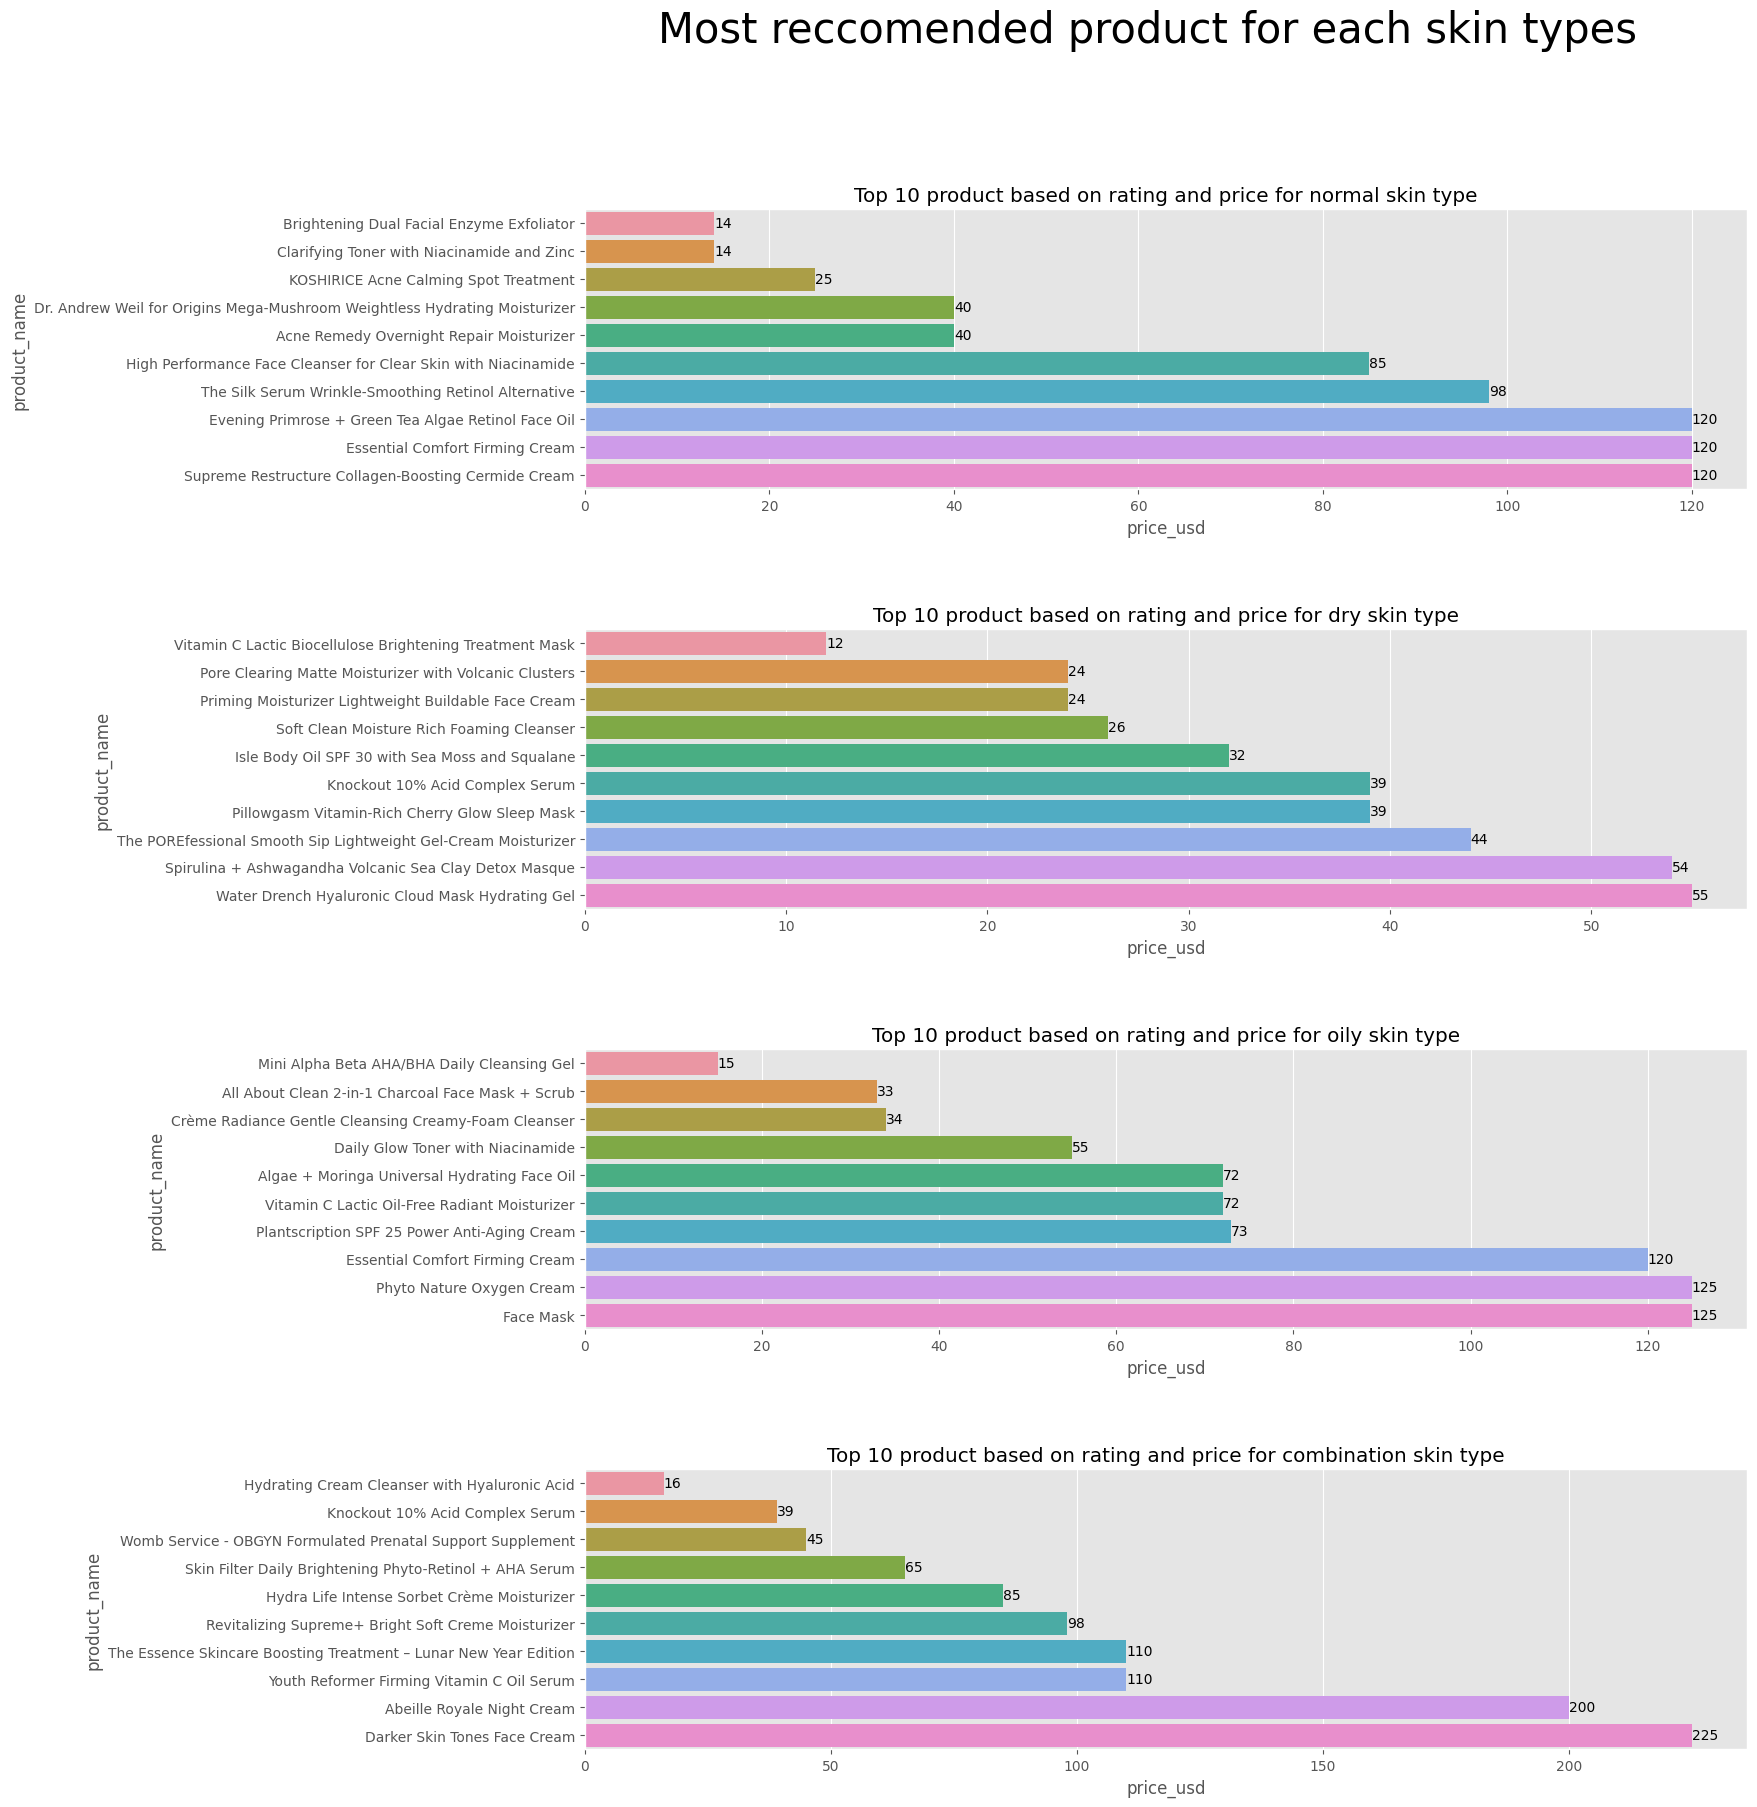

In [17]:
# Most reccomended product for each skin_type
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1,figsize= (15,20))
fig.subplots_adjust(hspace=0.5)

product_skin = df.groupby(['skin_type','product_id','product_name','price_usd']).mean(numeric_only=True)['rating'].reset_index()\
.sort_values('rating',ascending=False)

normal_skin = product_skin[product_skin['skin_type'] == 'normal'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax1 = sns.barplot(data=normal_skin,x='price_usd',y='product_name',ax=ax1)
ax1.set_title("Top 10 product based on rating and price for normal skin type")
for i in ax1.containers:
    ax1.bar_label(i)

dry_skin = product_skin[product_skin['skin_type'] == 'dry'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax2 = sns.barplot(data=dry_skin,x='price_usd',y='product_name',ax=ax2)
ax2.set_title("Top 10 product based on rating and price for dry skin type")
for i in ax2.containers:
    ax2.bar_label(i)

oily_skin = product_skin[product_skin['skin_type'] == 'oily'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax3 = sns.barplot(data=oily_skin,x='price_usd',y='product_name',ax=ax3)
ax3.set_title("Top 10 product based on rating and price for oily skin type")
for i in ax3.containers:
    ax3.bar_label(i)

combination_skin = product_skin[product_skin['skin_type'] == 'combination'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax4 = sns.barplot(data=combination_skin,x='price_usd',y='product_name',ax=ax4)
ax4.set_title("Top 10 product based on rating and price for combination skin type")
for i in ax4.containers:
    ax4.bar_label(i)


fig.suptitle("Most reccomended product for each skin types",fontsize=30)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='loves_count', ylabel='price_usd'>

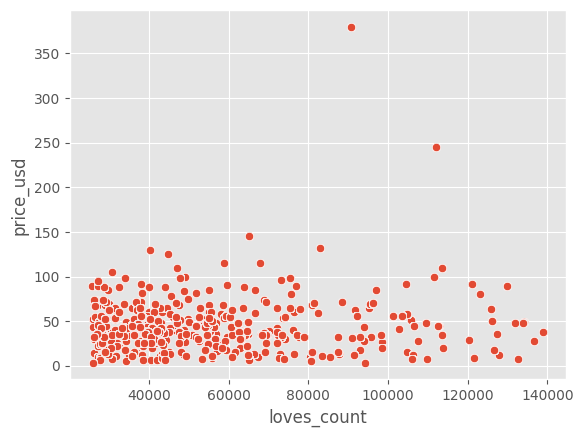

In [18]:
# Lets see the relationship between loves_count and the price_usd of the product
def remove_outliers(data, lower_quantile=0.25, upper_quantile=0.75):
    lower_bound = np.quantile(data, lower_quantile)
    upper_bound = np.quantile(data, upper_quantile)
    cleaned_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return cleaned_data
# Remove outliers using quantiles (5th percentile to 95th percentile)
cleaned_data = remove_outliers(df['loves_count'], lower_quantile=0.25, upper_quantile=0.75)

sns.scatterplot(data=df,x = cleaned_data,y=df['price_usd'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='is_recommended', ylabel='helpfulness'>

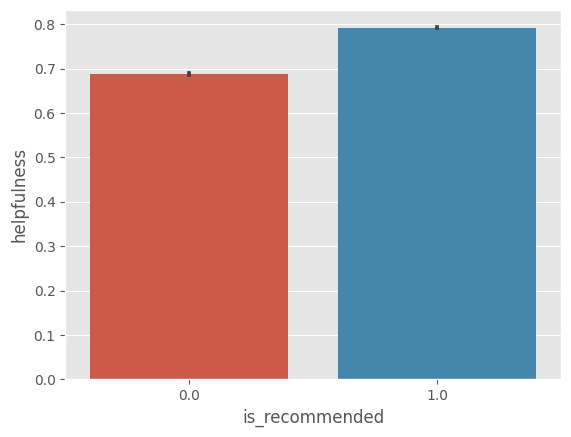

In [19]:
# Lets see is higher the is_recommended score also higher of helpfulness the product
sns.barplot(data=df,y = df['helpfulness'],x=df['is_recommended'])

In [20]:
df.shape

(366388, 39)

In [21]:
df = df[['review_text','is_recommended']]
df.head(5)

,review_text,is_recommended
16140,"Makeup remover, gentle cleanser, and all aroun...",1.0
16142,I wanted to love this so bad because it felt s...,0.0
16144,Best facial cleanser I have used! I heard grea...,1.0
16146,The smell is like roses and I don’t feel I get...,0.0
16147,"IM SO SAD! After 3 days of using this, my face...",0.0


In [22]:
df.is_recommended.value_counts()

is_recommended
1.0    281110
0.0     85278
Name: count, dtype: int64

In [23]:
# Rename the columns
df.rename(columns={'review_text':'text', 'is_recommended':'label'},  inplace=True)

pos = df[df['label'] == 1].sample(20000)
neg = df[df['label'] == 0].sample(20000)

# Concat pos and neg label
df = pd.concat([pos,neg],axis=0)
df.shape

(40000, 2)

In [24]:
#Percentage of Positive/Negative
print("Positive: ", round(df.label.value_counts()[1]/len(df)*100 , 2 ),"%")
print("Negative: ", round(df.label.value_counts()[0]/len(df)*100, 2 ),"%")

Positive:  50.0 %
Negative:  50.0 %


In [25]:
from sklearn.model_selection import train_test_split

X = df.text.values
y = df.label.values

# Pertama, bagi data menjadi training (70%) dan sisa (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y.astype(int), test_size=0.3, shuffle=True, random_state=42)

# Kemudian, bagi data sisa tersebut menjadi validation dan testing (masing-masing 50% dari data sisa)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=True, random_state=42)

In [26]:
print("Training Set:")
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

print("\nValidation Set:")
print("X_val: ", X_val.shape)
print("y_val: ", y_val.shape)

print("\nTesting Set:")
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

Training Set:
X_train:  (28000,)
y_train:  (28000,)

Validation Set:
X_val:  (6000,)
y_val:  (6000,)

Testing Set:
X_test:  (6000,)
y_test:  (6000,)


In [27]:
pd_hist = pd.Series([len(i.split()) for i in X_train])
pd_hist.describe()

count    28000.000000
mean        63.107929
std         45.737645
min          1.000000
25%         33.000000
50%         52.000000
75%         80.000000
max        394.000000
dtype: float64

Word Embedding using BERT

In [28]:
import torch
import torch.nn as nn
is_cuda = torch.cuda.is_available()

# If we have a GPU available,
# we'll set our device to GPU. We'll use this device variable later in our code.

if is_cuda:
    device = torch.device('cuda')
    print("Cuda is available")
else:
    device = torch.device('cpu')
    print("Cuda is not available using Cpu instead")

Cuda is available


In [29]:
%pip install transformers

In [30]:
from transformers import BertTokenizer, BertModel,BertForSequenceClassification
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

**Data Training**

In [31]:
encoded_data_train = tokenizer.batch_encode_plus(
    X_train,
    add_special_tokens=True,
    return_attention_mask=True,
    padding=True,
    max_length=128,
    truncation=True,
    return_tensors='pt'
)

**Data Validation**

In [32]:
encoded_data_val = tokenizer.batch_encode_plus(
   X_val,
    add_special_tokens=True,
    return_attention_mask=True,
    padding=True,
    max_length=128,
    truncation=True,
    return_tensors='pt'
)

**Data Testing**

In [33]:
encoded_data_test = tokenizer.batch_encode_plus(
   X_test,
    add_special_tokens=True,
    return_attention_mask=True,
    padding=True,
    max_length=128,
    truncation=True,
    return_tensors='pt'
)

In [34]:
# Encoding Data Training
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(y_train)

# Encoding Data Validation
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(y_val)

# Encoding Data Testing
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(y_test)

**Labels Data Training**

In [35]:
labels_train

tensor([0, 1, 0,  ..., 0, 1, 1])

**Labels Data Validation**

In [36]:
labels_val

tensor([0, 1, 1,  ..., 0, 1, 1])

**Labels Data Testing**

In [37]:
labels_test

tensor([0, 1, 1,  ..., 1, 0, 0])

In [38]:
from torch.utils.data import DataLoader, TensorDataset
# Dataset Training
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

# Dataset Validation
dataset_val = TensorDataset(input_ids_val, 
                            attention_masks_val,
                            labels_val)

# Dataset Testing
dataset_test = TensorDataset(input_ids_test, 
                             attention_masks_test,
                             labels_test)

In [39]:
#Loading the pre-trained BERT model from huggingface library

from transformers import  AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", 
    num_labels = 2,   
    output_attentions = False, 
    output_hidden_states = False, )

model = torch.nn.DataParallel(model)
# Teeling the model to run on GPU
model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DataParallel(
  (module): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768, 

In [40]:
from torch.utils.data import DataLoader, RandomSampler
batch_size = 32

# Train Dataloader
train_dataloader = DataLoader(
    dataset_train,
    sampler=RandomSampler(dataset_train),
    batch_size=batch_size
)

# Validation Dataloader
validation_dataloader = DataLoader(
    dataset_val,
    sampler=RandomSampler(dataset_val),
    batch_size=batch_size
)

# Test Dataloader
test_dataloader = DataLoader(
    dataset_test,
    sampler=RandomSampler(dataset_test),
    batch_size=batch_size
)

In [41]:
# AdamW is an optimizer which is a Adam Optimzier with weight-decay-fix
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, 
                  eps = 1e-8 
                )

from transformers import get_linear_schedule_with_warmup

# Number of training epochs
epochs = 10

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
            num_warmup_steps = 0, # Default value in run_glue.py
            num_training_steps = total_steps)
scheduler

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [42]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [43]:
#Creating the helper function to have a watch on elapsed time

import time
import datetime
# 
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [44]:
#Let's start the training process
from sklearn.metrics import accuracy_score
import random 

early_stopping_steps = 1  # Jumlah langkah tanpa peningkatan sebelum early stopping
early_stopping_counter = 0
best_val_accuracy = 0.0  # Inisialisasi dengan nilai yang rendah

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []
accuracy_values = [] 

train_accuracy_values = []
val_accuracy_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    model.train()
    predictions, true_labels = [], []
    
    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 50 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
#         print(b_labels.shape)
        # Always clear any previously calculated gradients before performing a
        # backward pass. 
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]
        
        if isinstance(loss, torch.Tensor):
            loss = loss.mean()
        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        # Compute predictions
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)
        preds = torch.argmax(probabilities, dim=1)

        predictions.extend(preds.cpu().numpy())
        true_labels.extend(b_labels.cpu().numpy())
        
        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()
    
    # Calculate training accuracy
    training_accuracy = accuracy_score(true_labels, predictions)
    
    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Training Accuracy: {0:.4f}".format(training_accuracy))
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))
    
    train_accuracy_values.append(training_accuracy)
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1
        
    # Store validation accuracy for each epoch
    val_accuracy_values.append(eval_accuracy / nb_eval_steps)
        
    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
    
    if eval_accuracy > best_val_accuracy:
        best_val_accuracy = eval_accuracy
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
        
    if early_stopping_counter >= early_stopping_steps:
        print(f"Early stopping after {epoch_i + 1} epochs.")
        break
        # Check for early stopping
    
print("")
print("Training complete!")


======== Epoch 1 / 10 ========
Training...
  Batch    50  of    875.    Elapsed: 0:00:20.
  Batch   100  of    875.    Elapsed: 0:00:38.
  Batch   150  of    875.    Elapsed: 0:00:56.
  Batch   200  of    875.    Elapsed: 0:01:14.
  Batch   250  of    875.    Elapsed: 0:01:32.
  Batch   300  of    875.    Elapsed: 0:01:50.
  Batch   350  of    875.    Elapsed: 0:02:08.
  Batch   400  of    875.    Elapsed: 0:02:27.
  Batch   450  of    875.    Elapsed: 0:02:45.
  Batch   500  of    875.    Elapsed: 0:03:03.
  Batch   550  of    875.    Elapsed: 0:03:21.
  Batch   600  of    875.    Elapsed: 0:03:39.
  Batch   650  of    875.    Elapsed: 0:03:57.
  Batch   700  of    875.    Elapsed: 0:04:15.
  Batch   750  of    875.    Elapsed: 0:04:33.
  Batch   800  of    875.    Elapsed: 0:04:51.
  Batch   850  of    875.    Elapsed: 0:05:09.

  Training Accuracy: 0.9200
  Average training loss: 0.22
  Training epoch took: 0:05:18

Running Validation...
  Accuracy: 0.94
  Validation took: 0:00:21


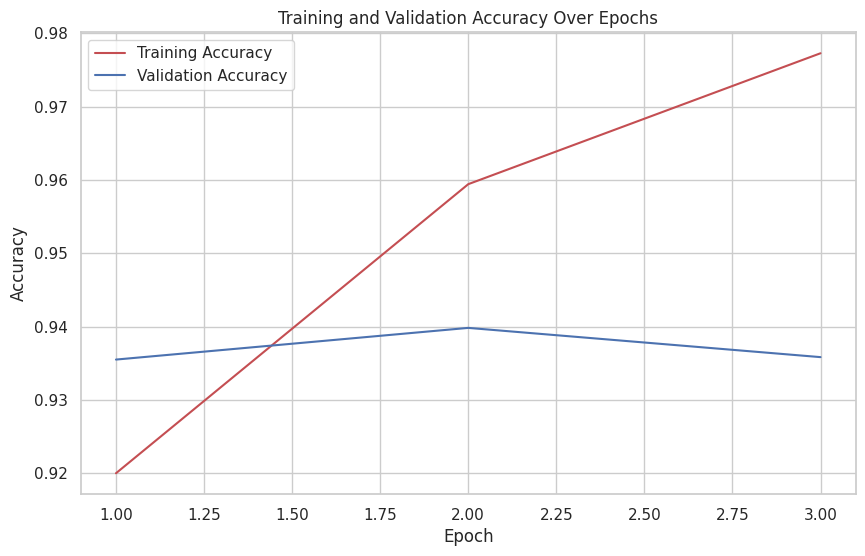

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create figure outside the loop
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plotting the training and validation accuracy over epochs

min_len = min(len(train_accuracy_values), len(val_accuracy_values))
plt.plot(np.arange(1, min_len + 1), train_accuracy_values[:min_len], label='Training Accuracy', color='r')
plt.plot(np.arange(1, min_len + 1), val_accuracy_values[:min_len], label='Validation Accuracy', color='b')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

    # Check if training is stopped (break is used)


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize variables for evaluation
eval_accuracy = 0
eval_precision = 0
eval_recall = 0
eval_f1 = 0
nb_eval_steps = 0

# Assuming you have a function flat_accuracy that computes accuracy
# and a dataloader named validation_dataloader

# Iterate through validation batches
for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    
    # Disable gradient computation
    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        logits = outputs[0].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate accuracy
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        
        # Calculate precision, recall, and F1-score
        y_pred = torch.argmax(torch.tensor(logits), dim=1).numpy()
        tmp_eval_precision = precision_score(label_ids, y_pred, average='weighted',zero_division=0)
        tmp_eval_recall = recall_score(label_ids, y_pred, average='weighted',zero_division=0)
        tmp_eval_f1 = f1_score(label_ids, y_pred, average='weighted',zero_division=0)
        
        eval_precision += tmp_eval_precision
        eval_recall += tmp_eval_recall
        eval_f1 += tmp_eval_f1
        
        # Track the number of batches
        nb_eval_steps += 1

# Compute average accuracy and F1-score
final_accuracy = eval_accuracy / nb_eval_steps
final_precision = eval_precision / nb_eval_steps
final_recall = eval_recall / nb_eval_steps
final_f1 = eval_f1 / nb_eval_steps

print(f"Validation Accuracy: {final_accuracy:.4f}")
print(f"Validation Precision: {final_precision:.4f}")
print(f"Validation Recall: {final_recall:.4f}")
print(f"Validation F1-score: {final_f1:.4f}")

Validation Accuracy: 0.9360
Validation Precision: 0.9401
Validation Recall: 0.9360
Validation F1-score: 0.9360


In [47]:
def predict_review(sentence):
    # Ensure the model is in evaluation mode
    model.eval()
    # Tokenize the test sentence and convert to input IDs
    inputs = tokenizer(sentence, padding=True, truncation=True, max_length=128, return_tensors='pt')
    # Get model outputs
    with torch.no_grad():
        outputs = model(**inputs)
    # The outputs are logits. Get the predictions:
    _, preds = torch.max(outputs.logits, dim=1) 
    # Now `preds` contains the model's predictions
    return preds.item()

# Example usage
example_review = "I want that so badly"
sentiment = predict_review(example_review)

sentiment_mapping = {0: 'Negative', 1: 'Positive'}
print(f'Sentiment: {sentiment_mapping[sentiment]}')

Sentiment: Positive
